# بسم الله الرحمن الرحيم

In [1]:
# Load image
import cv2

image = cv2.imread("img/red_panda.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray panda", gray_image)
cv2.imshow("Red panda", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# Save image
import cv2

image = cv2.imread("img/red_panda.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imwrite("out/gray_panda.jpg", gray_image)

True

In [3]:
# Read from Webcam
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    # Ret is just equal to True or False. It’s true if cap is reading a frame, 
    # and frame is the the array containing the image.
    ret, frame = cap.read()
   
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
# Read from File
import cv2
import numpy as np

cap = cv2.VideoCapture("vid/red_panda_snow.mp4")

while True:
    ret, frame = cap.read()
   
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [5]:
# Read Video from file and Save it to file
import cv2
import numpy as np

cap = cv2.VideoCapture("vid/red_panda_snow.mp4")

fourcc = cv2.VideoWriter_fourcc(*"XVID")
out = cv2.VideoWriter("out/flipped_red_panda.avi", fourcc, 25, (640, 360))

while True:
    ret, frame = cap.read()
    frame2 = cv2.flip(frame, 1)
    
    cv2.imshow("frame2", frame2)
    cv2.imshow("frame", frame)
    
    out.write(frame2)
    
    key = cv2.waitKey(25)
    if key == 27:
        break

out.release()
cap.release()
cv2.destroyAllWindows()

In [6]:
# Drawing and Writing on images
import cv2
import numpy as np
 
image = cv2.imread("img/red_panda.jpg")
shape = image.shape
print(shape)
 
blue = (255, 0, 0)
red = (0, 0, 255)
green = (0, 255, 0)
violet = (180, 0, 180)
yellow = (0, 180, 180)
white = (255, 255, 255)
 
cv2.line(image, (50, 30), (450, 35), blue, thickness=5)
cv2.circle(image, (240, 205), 23, red, -1)
cv2.rectangle(image, (50, 60), (450, 95), green, -1)
cv2.ellipse(image, (250, 150), (80, 20), 5, 0, 360, violet, -1)
points = np.array([[[140, 230], [380, 230], [320, 250], [250, 280]]], np.int32)
cv2.polylines(image, [points], True, yellow, thickness=3)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(image, "Panda", (20, 180), font, 4, white)
 
cv2.imshow("red panda", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

(300, 500, 3)


In [7]:
# Basic operations on images
import cv2
import numpy as np
 
image = cv2.imread("img/red_panda.jpg")
rows, cols, ch = image.shape

# roi = Region of Interest 
roi = image[100: 280, 150: 320]
 
cv2.imshow("Panda", image)
cv2.imshow("Roi", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Add images and Threshold
import cv2
import numpy as np
 
img1 = cv2.imread("img/road.jpg")
img2 = cv2.imread("img/car.jpg")

cv2.imshow("img1", img1) # original image
cv2.imshow("img2", img2) # original image

# To add the images, they must have the same size
wrong_sum = cv2.add(img1, img2)
cv2.imshow("wrong sum", wrong_sum)

# Why is it wrong?
# We take the sum of the pixels - pixel by pixel
print(img1[0, 0]) # 1st pixel
print(img2[0, 0]) # 1st pixel
print(wrong_sum[0,0])

# Better way to add images
# weighted sum
weighted = cv2.addWeighted(img1, 1, img2, 0.1, 0)

# Remove white background
# step 01: convert image to gray
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# Note: Lights color has changed from orange to white
cv2.imshow("img2gray", img2_gray)

#Simple Thresholding
# Here, the matter is straight forward. 
# If pixel value is greater than a threshold value, it is assigned one value (may be white), 
# else it is assigned another value (may be black). 
# The function used is cv2.threshold. 
# First argument is the source image, which should be a grayscale image. 
# Second argument is the threshold value which is used to classify the pixel values. 
# Third argument is the maxVal which represents the value to be given if pixel value is more than 
# (sometimes less than) the threshold value. 
# OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function

# step 02: Define threshold
# all values greater than 0 will be 255
# any pixel with value larger than 0 will be white
# else, pixel will be black, because we are using threshold binary
ret, threshold = cv2.threshold(img2_gray, 0, 255, cv2.THRESH_BINARY)
cv2.imshow("threshold", threshold)

# Here, all values greater than 240 will be white
# else, they will be black, because we are using threshold binary
ret, mod2_threshold = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
cv2.imshow("mod2 threshold", mod2_threshold)

# threshold binary inverted
ret, mask = cv2.threshold(img2_gray, 252, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("mask", mask)

sum = cv2.add(img2, img2, mask=mask)
 
cv2.imshow("sum", sum)
cv2.imshow("threshold", mask)
cv2.imshow("weighted", weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

[149 144 143]
[255 255 255]
[255 255 255]


In [10]:
# Blending Images
import cv2
import numpy as np
 
img1 = cv2.imread("img/road.jpg")
img2 = cv2.imread("img/car.jpg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
 
ret, mask = cv2.threshold(img2_gray, 240, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
 
road = cv2.bitwise_and(img1, img1, mask=mask)
car = cv2.bitwise_and(img2, img2, mask=mask_inv)
result = cv2.add(road, car)
 
cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.imshow("road background", road)
cv2.imshow("car no background", car)
cv2.imshow("mask", mask)
cv2.imshow("mask inverse", mask_inv)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# Bitwise Operators
import cv2
import numpy as np
 
img1 = cv2.imread("img/drawing_1.png")
img2 = cv2.imread("img/drawing_2.png")
 
bit_and = cv2.bitwise_and(img2, img1)

# white or black -> white
bit_or = cv2.bitwise_or(img2, img1)

bit_xor = cv2.bitwise_xor(img1, img2)
bit_not = cv2.bitwise_not(img1)
bit_not2 = cv2.bitwise_not(img2)
 
 
cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
 
cv2.imshow("bit_and", bit_and)
cv2.imshow("bit_or", bit_or)
cv2.imshow("bit_xor", bit_xor)
cv2.imshow("bit_not", bit_not)
cv2.imshow("bit_not2", bit_not2)
 
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Trackbars
import cv2
import numpy as np

# something for C++ - Maybe
def nothing(x):
    pass
 
cap = cv2.VideoCapture(0)
 
cv2.namedWindow("frame")
cv2.createTrackbar("test", "frame", 50, 500, nothing)
cv2.createTrackbar("color/gray", "frame", 0, 1, nothing)
 
while True:
    _, frame = cap.read()
 
    test = cv2.getTrackbarPos("test", "frame")
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(frame, str(test), (50, 150), font, 4, (0, 0, 255))
 
    s = cv2.getTrackbarPos("color/gray", "frame")
    if s == 0:
        pass
    else:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow("frame", frame)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [12]:
# Object Detection using HSV
import cv2
import numpy as np
 
def nothing(x):
    pass
 
cap = cv2.VideoCapture(0)
cv2.namedWindow("Trackbars")
 
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
 
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
    # Low and High
    # Because we take a range of values, not only a single value
    # To avoid lightening effect, etc.

    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    lower_color = np.array([l_h, l_s, l_v])
    upper_color = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_color, upper_color)
 
    result = cv2.bitwise_and(frame, frame, mask=mask)
 
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("result", result)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [13]:
# Basic Thresholding
# Demo 01
import cv2
import numpy as np
 
img = cv2.imread("img/black_to_white.jpeg", cv2.IMREAD_GRAYSCALE)
 
_, threshold_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
_, threshold_binary_inv = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
# values above threshold will be truncated to the threshold, but values below it will keep their values
_, threshold_trunc = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
# values below threshold will be set to zero
_, threshold_to_zero = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
 
cv2.imshow("Image", img)
cv2.imshow("th binary", threshold_binary)
cv2.imshow("th binary inv", threshold_binary_inv)
cv2.imshow("th trunc", threshold_trunc)
cv2.imshow("th to zero", threshold_to_zero)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# Threshold with Trackbar
import cv2
import numpy as np
 
def nothing(x):
    pass
 
img = cv2.imread("img/red_panda.jpg", cv2.IMREAD_GRAYSCALE)
cv2.namedWindow("Image")
cv2.createTrackbar("Threshold value", "Image", 128, 255, nothing)
 
 
while True:
    value_threshold = cv2.getTrackbarPos("Threshold value", "Image")
    _, threshold_binary = cv2.threshold(img, value_threshold, 255, cv2.THRESH_BINARY)
    _, threshold_binary_inv = cv2.threshold(img, value_threshold, 255, cv2.THRESH_BINARY_INV)
    _, threshold_trunc = cv2.threshold(img, value_threshold, 255, cv2.THRESH_TRUNC)
    _, threshold_to_zero = cv2.threshold(img, value_threshold, 255, cv2.THRESH_TOZERO)
    _, threshold_to_zero_inv = cv2.threshold(img, value_threshold, 255, cv2.THRESH_TOZERO_INV)
 
 
    cv2.imshow("Image", img)
    cv2.imshow("th binary", threshold_binary)
    cv2.imshow("th binary inv", threshold_binary_inv)
    cv2.imshow("th trunc", threshold_trunc)
    cv2.imshow("th to zero", threshold_to_zero)
    cv2.imshow("th to zero inv", threshold_to_zero_inv)
 
    key = cv2.waitKey(100)
    if key == 27:
        break
 
cv2.destroyAllWindows()

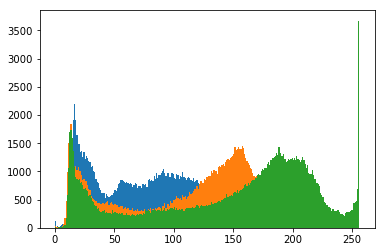

In [3]:
# Histogram
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread("img/red_panda.jpg")
b, g, r = cv2.split(img)
 
# cv2.imshow("img", img)
# cv2.imshow("b", b)
# cv2.imshow("g", g)
# cv2.imshow("r", r)
 
plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])
plt.show()

## Digital Image Transformations

### Kernel
In image processing, a kernel, convolution matrix, or mask is a small matrix. 
- It is used for blurring, sharpening, embossing, edge detection, and more. 
- This is accomplished by doing a convolution between a kernel and an image. 
The general expression of a convolution is 

<img src="imgs/kernel_01.svg" >

where g ( x , y ) is the filtered image, f ( x , y ) is the original image, ω is the filter kernel. Every element of the filter kernel is considered by − a ≤ s ≤ a and − b ≤ t ≤ b .

| Operation                                                                                                      | Kernel                                                      |  Image Result                                                       |
|----------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------|
| Identity                                                                                                       | <img src="imgs/kernel_identity.svg" />                      | <img src="imgs/kernel_identity_result.png" />                       |
| Edge Detection                                                                                                 | <img src="imgs/kernel_edge_detection_01.svg" />             | <img src="imgs/kernel_edge_detection_01_result.png" />              |
| Edge Detection                                                                                                 | <img src="imgs/kernel_edge_detection_02.svg" />             | <img src="imgs/kernel_edge_detection_02_result.png" />              |
| Edge Detection                                                                                                 | <img src="imgs/kernel_edge_detection_03.svg" />             | <img src="imgs/kernel_edge_detection_03_result.png" />              |
| Sharpen                                                                                                        | <img src="imgs/kernel_sharpen.svg" />                       | <img src="imgs/kernel_sharpen_result.png" />                        |
| Box Blur (normalized)                                                                                          | <img src="imgs/kernel_box_blur.svg" />                      | <img src="imgs/kernel_box_blur_result.png" />                       |
| Gaussian Blur (3 x 3) Approximation                                                                            | <img src="imgs/kernel_gaussian_blur_approximation_3.svg" /> | <img src="imgs/kernel_gaussian_blur_approximation_3_result.png" />  |
| Gaussian Blur (5 x 5) Approximation                                                                            | <img src="imgs/kernel_gaussian_blur_approximation_5.svg" /> |  <img src="imgs/kernel_gaussian_blur_approximation_5_result.png" /> |
|  Unsharp Masking (5 x 5) Based on Gaussian Blur      | <img src="imgs/kernel_unsharp_masking.svg" />           | <img src="imgs/kernel_unsharp_masking_result.png" />                |


- Note: Unsharp Masking - 5 × 5 - Based on Gaussian blur with amount as 1 and threshold as 0 (with no image mask)
- The above are just a few examples of effects achievable by convolving kernels and images. 
- Origin: 
  - The origin is the position of the kernel which is above (conceptually) the current output pixel. 
  - This could be outside of the actual kernel, though usually it corresponds to one of the kernel elements. 
  - For a symmetric kernel, the origin is usually the center element. 

### Convolution
- Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. 
- This is related to a form of mathematical convolution. 
- It should be noted that the matrix operation being performed - convolution - is not traditional matrix multiplication, despite being similarly denoted by *.
- For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and then multiplying locally similar entries and summing. 
- The element at coordinates [2, 2] (that is, the central element) of the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel:

<img src="imgs/convolution.svg" />

- The other entries would be similarly weighted, where we position the center of the kernel on each of the boundary points of the image, and compute a weighted sum.
- The values of a given pixel in the output image are calculated by multiplying each kernel value by the corresponding input image pixel values. 
- This can be described algorithmically with the following pseudo-code: 

for each image row in input image:
   for each pixel in image row:

      set accumulator to zero

      for each kernel row in kernel:
         for each element in kernel row:

            if element position  corresponding* to pixel position then
               multiply element value  corresponding* to pixel value
               add result to accumulator
            endif

      set output image pixel to accumulator
      

- If the kernel is symmetric then place the center (origin) of kernel on the current pixel. 
- Then kernel will be overlapped with neighboring pixels too. 
- Now multiply each kernel element with the pixel value it overlapped with and add all the obtained values. 
- Resultant value will be the value for the current pixel that is overlapped with the center of the kernel.
- If the kernel is not symmetric, it has to be flipped both around its horizontal and vertical axis before calculating the convolution as above.
- Edge Handling: Kernel convolution usually requires values from pixels outside of the image boundaries. There are a variety of methods for handling image edges.
  - Extend: The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.
  - Wrap: The image is conceptually wrapped (or tiled) and values are taken from the opposite edge or corner.
  - Mirror: The image is conceptually mirrored at the edges. For example, attempting to read a pixel 3 units outside an edge reads one 3 units inside the edge instead.
  - Crop: Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.
  - Kernel Crop: Any pixel in the kernel that extends past the input image isn't used and the normalizing is adjusted to compensate.

- Normalization: defined as the division of each element in the kernel by the sum of all kernel elements, so that the sum of the elements of a normalized kernel is one. This will ensure the average pixel in the modified image is as bright as the average pixel in the original image. 

<img src="imgs/Extend_Edge-Handling.png" />

### Filtering
- Digital filters are used to blur and sharpen digital images. 
- Filtering can be performed in the spatial domain by convolution with specifically designed kernels (filter array), or in the frequency (Fourier) domain by masking specific frequency regions. 

In [18]:
# Basic Geometric Transformations
import cv2
import numpy as np
 
img = cv2.imread("img/red_panda.jpg")
rows, cols, ch = img.shape
 
print("Height: ", rows)
print("Width: ", cols)
 
scaled_img = cv2.resize(img, None, fx=1/2, fy=1/2)
 
matrix_t = np.float32([[1, 0, -100], [0, 1, -30]])
translated_img = cv2.warpAffine(img, matrix_t, (cols, rows))
 
matrix_r = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.5)
rotated_img = cv2.warpAffine(img, matrix_r, (cols, rows))
 
cv2.imshow("Original image", img)
cv2.imshow("Scaled image", scaled_img)
cv2.imshow("Translated image", translated_img)
cv2.imshow("Rotated image", rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Height:  300
Width:  500


In [19]:
# Perspective Transformation
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
 
while True:
    _, frame = cap.read()
 
    cv2.circle(frame, (155, 120), 5, (0, 0, 255), -1)
    cv2.circle(frame, (480, 120), 5, (0, 0, 255), -1)
    cv2.circle(frame, (20, 475), 5, (0, 0, 255), -1)
    cv2.circle(frame, (620, 475), 5, (0, 0, 255), -1)
 
    pts1 = np.float32([[155, 120], [480, 120], [20, 475], [620, 475]])
    pts2 = np.float32([[0, 0], [500, 0], [0, 600], [500, 600]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
 
    result = cv2.warpPerspective(frame, matrix, (500, 600))
 
 
    cv2.imshow("Frame", frame)
    cv2.imshow("Perspective transformation", result)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [20]:
# Affine Transformation
import cv2
import numpy as np
 
img = cv2.imread("img/grid.jpg")
rows, cols, ch = img.shape
 
cv2.circle(img, (83, 90), 5, (0, 0, 255), -1)
cv2.circle(img, (447, 90), 5, (0, 0, 255), -1)
cv2.circle(img, (83, 472), 5, (0, 0, 255), -1)
 
pts1 = np.float32([[83, 90], [447, 90], [83, 472]])
pts2 = np.float32([[0, 0], [447, 90], [150, 472]])
 
matrix = cv2.getAffineTransform(pts1, pts2)
result = cv2.warpAffine(img, matrix, (cols, rows))
 
cv2.imshow("Image", img)
cv2.imshow("Affine transformation", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Adaptive Thresholding
In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.

    cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

The mean is the average of the numbers. It is easy to calculate: add up all the numbers, then divide by how many numbers there are. In other words it is the sum divided by the count

To use the formula - Gaussian Weighted Sum:

    Multiply the numbers in your data set by the weights.
    Add the numbers in Step 1 up. Set this number aside for a moment.
    Add up all of the weights.
    Divide the numbers you found in Step 2 by the number you found in Step 3

In [21]:
# Adaptive Thresholding
import cv2
import numpy as np

img = cv2.imread("img/book_page.jpg")

_, threshold = cv2.threshold(img, 155, 255, cv2.THRESH_BINARY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mean_c = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 12)
gaus = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 12)

cv2.imshow("Img", img)
cv2.imshow("Binary threshold", threshold)
cv2.imshow("Mean C", mean_c)
cv2.imshow("Gaussian", gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Smoothing Images
import cv2
import numpy as np
 
# img = cv2.imread("img/early_1800.jpg")
# img = cv2.imread("img/balloons_noisy.png")
img = cv2.imread("img/carpet.jpg")
# img = cv2.imread("img/lake.jpg")
 
averaging = cv2.blur(img, (21, 21))
gaussian = cv2.GaussianBlur(img, (21, 21), 0)
median = cv2.medianBlur(img, 5)
bilateral = cv2.bilateralFilter(img, 9, 350, 350)
 
cv2.imshow("Original image", img)
cv2.imshow("Averaging", averaging)
cv2.imshow("Gaussian", gaussian)
cv2.imshow("Median", median)
cv2.imshow("Bilateral", bilateral)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
# Image Morphological Transformations
# Remove Noise from an image

import cv2
import numpy as np
 
img = cv2.imread("img/balls.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.imread("img/orange.jpg", cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY_INV)

# in dilation, wholes smaller than kernel size will not be shown
# test different kernel sizes
kernel = np.ones((5, 5), np.uint8)

# Fill the wholes inside the object
dilation = cv2.dilate(mask, kernel)

# Removes noise around the object
# used mainly when we want to separate objects
# In balls example, some balls are connected to others
# using erosion, we can easily separate different balls
# iterations - how many times using the kernel we iterate over the image
erosion = cv2.erode(mask, kernel, iterations=6)
 
cv2.imshow("Image", img)
cv2.imshow("Mask", mask)
cv2.imshow("Dilation", dilation)
cv2.imshow("Erosion", erosion)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# Realtime Video Morphological Transformation
import cv2
import numpy as np
 
def nothing(x):
    pass
 
cap = cv2.VideoCapture(0)
cv2.namedWindow("Trackbars")
 
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
 
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
 
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
 
    kernel = np.ones((5, 5), np.uint8)
    erosion = cv2.erode(mask, kernel)
    dilation = cv2.dilate(mask, kernel)
 
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
 
    result = cv2.bitwise_and(frame, frame, mask=mask)
 
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("erosion", erosion)
    cv2.imshow("dilation", dilation)
    cv2.imshow("Opening", opening)
    cv2.imshow("Closing", closing)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [25]:
# Edge Detection

# Sharp change in color intensity / value
import cv2
import numpy as np
 
img = cv2.imread("img/white_panda.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (11, 11), 0) # To remove noise from images
# You can try the following algos, once with, and once without

# Use change of contrast
# First, Horizontally
# Then, Vertically
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0) # 1 0 -> X Axis
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1) # 0 1 -> Y Axis
 
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5) # Try different kernel sizes
# Try different blur values with different kernel sizes
 
canny = cv2.Canny(img, 100, 150) # 100 -> Threshold, below it non edges
# 150 above it are edges
 
cv2.imshow("Image", img)
cv2.imshow("Sobelx", sobelx) # Poor - with noise
cv2.imshow("Sobely", sobely)
cv2.imshow("Laplacian", laplacian)
cv2.imshow("Canny", canny)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
# Realtime Video Edge Detection
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
 
while True:
    _, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
 
    laplacian = cv2.Laplacian(blurred_frame, cv2.CV_64F)
#     canny = cv2.Canny(blurred_frame, 100, 150)
    canny = cv2.Canny(blurred_frame, 10, 50)
 
    cv2.imshow("Frame", frame)
    cv2.imshow("Laplacian", laplacian)
    cv2.imshow("Canny", canny)
 
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [27]:
# Find and Draw Contours
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
 
while True:
    _, frame = cap.read()
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)
 
    lower_blue = np.array([38, 86, 0])
    upper_blue = np.array([121, 255, 255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
 
    _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
 
    for contour in contours:
        area = cv2.contourArea(contour)
 
        if area > 5000:
            cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)
 
 
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [28]:
# Template Matching
import cv2
import numpy as np
 
img = cv2.imread("img/simpsons.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread("img/barts_face.jpg", cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
 
result = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(result >= 0.4)
 
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)
 
 
cv2.imshow("img", img)
 
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
### SKIP THIS DEMO NOW

# Realtime Video Template Matching
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
template = cv2.imread("img/dasani.jpg", cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]

while True:
    _, frame = cap.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    res = cv2.matchTemplate(gray_frame, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= 0.7)
 
    for pt in zip(*loc[::-1]):
        cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)
 
    cv2.imshow("Frame", frame)
 
    key = cv2.waitKey(1)
 
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()

In [29]:
# Lines Detection
import cv2
import numpy as np
 
img = cv2.imread("img/lines.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
 
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
 
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
 
cv2.imshow("Edges", edges)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
# Lines Detection - Video
import cv2
import numpy as np
 
video = cv2.VideoCapture("vid/road_car_view.mp4")
 
while True:
    ret, orig_frame = video.read()
    if not ret:
        video = cv2.VideoCapture("vid/road_car_view.mp4")
        continue
 
    frame = cv2.GaussianBlur(orig_frame, (5, 5), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 94, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    edges = cv2.Canny(mask, 75, 150)
 
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=50)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
 
    cv2.imshow("frame", frame)
    cv2.imshow("edges", edges)
 
    key = cv2.waitKey(25)
    if key == 27:
        break
video.release()
cv2.destroyAllWindows()

In [33]:
# Corners Detection
import cv2
import numpy as np
 
img = cv2.imread("img/squares.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
corners = cv2.goodFeaturesToTrack(gray, 150, 0.8, 5)
corners = np.int0(corners)
 
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
 
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
 

In [ ]:
# Corners Detection - Realtime
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
 
def nothing(x):
    pass
 
cv2.namedWindow("Frame")
cv2.createTrackbar("quality", "Frame", 1, 100, nothing)
 
while True:
    _, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    quality = cv2.getTrackbarPos("quality", "Frame")
    quality = quality / 100 if quality > 0 else 0.01
    corners = cv2.goodFeaturesToTrack(gray, 100, quality, 20)
 
    if corners is not None:
        corners = np.int0(corners)
 
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(frame, (x, y), 3, (0, 0, 255), -1)
 
    cv2.imshow("Frame", frame)
 
    key = cv2.waitKey(1)
    if key == 27:
        break
 
cap.release()
cv2.destroyAllWindows()